In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#import dataframes that will allow us to scale the sample by square footage
scale = pd.read_csv("D:\\California\\finalGroup\\results_out_oneLag\\heatingCooling\\dfs\\scale_up_homes.csv")
metaData = pd.read_csv("D:\\California\\finalGroup\\results_out_oneLag\\heatingCooling\\dfs\\ecobee_metadata_regression.csv",
                       usecols=['Identifier','Floor_Area__ft2_']).reset_index()

identifiers = metaData.Identifier.unique()
metaData.head()

,index,Identifier,Floor_Area__ft2_
0,0,2cd266719bc536a29407d44cfadb1648a43c56bf,1500
1,1,d253b818fdcfab79d1aef2f85b25daf5ab914166,1500
2,2,a63438fbf6c57c582e02cb0ac38f802562e5f795,2500
3,3,e5b8175ffd51c5ab2d372d3579db46ff94f858ec,2000
4,4,a4180e0682a7d1d721af7a1d021fd3181def0bce,2000


# This one is for bootstrapping up from 403 to 7500000

In [24]:
#####variables######
numHomesCA = 7500000
nBoot = 50 #number of times we want to bootstap 

###########

count = 0
for k in range(nBoot):
    bootDF = pd.DataFrame()
    
    mergeDF = pd.DataFrame()
    
    group = 0
    for low, high, percent in zip(scale.more_than, scale.less_than, scale.percentage):
        
        group += 1
        
        scaleUp = percent * numHomesCA
        
        #get the homes from the metadata with the size we want 
        sample = metaData[(metaData.Floor_Area__ft2_ >= low) & (metaData.Floor_Area__ft2_ < high)].reset_index()
        
        #the index number from the big group of these identifiers we care about so we can merge later 
        sampleIndex = np.array(sample['index'])
 
        
        #randomly select 7.5 million * the percentage of the housing stock they represent
        newIndex = np.random.randint(0,len(sample['index']),int(scaleUp))
        
        #make these results into a dataframe so we can scale them 
        unique, counts = np.unique(sampleIndex[newIndex], return_counts = True)
        
        countsDF = pd.DataFrame({'indexMerge':unique,'count_scale':counts})
        countsDF['group_size_number'] = group
        
        mergeDF = pd.concat([mergeDF,countsDF])
    

        
    count+= 1
    
    finalDF = pd.DataFrame({'indexMerge':pd.Series(range(0,403))})
    finalDF = finalDF.merge(mergeDF,how='left',on='indexMerge')
    finalDF = finalDF.merge(metaData,how='left',left_on='indexMerge',right_on='index')
    finalDF['boostrap_run'] = count
    
    print(str(count))
    finalDF.to_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\bootstrapHomesWeight\\test50_403\\bootstrap_"+str(count)+'.csv')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


KeyboardInterrupt: 

In [9]:
finalDF = pd.DataFrame()
for i in range(50):
    i += 1
    
    newDF = pd.read_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\bootstrapHomesWeight\\test_50\\bootstrap_"+str(i)+".csv")
    
    finalDF = pd.concat([finalDF,newDF])
finalDF.head(50)

,Unnamed: 0,indexMerge,count_scale,group_size_number,index,Identifier,Floor_Area__ft2_,boostrap_run
0,0,0,12260,2,0,2cd266719bc536a29407d44cfadb1648a43c56bf,1500,1
1,1,1,12255,2,1,d253b818fdcfab79d1aef2f85b25daf5ab914166,1500,1
2,2,2,6525,3,2,a63438fbf6c57c582e02cb0ac38f802562e5f795,2500,1
3,3,3,12056,2,3,e5b8175ffd51c5ab2d372d3579db46ff94f858ec,2000,1
4,4,4,11923,2,4,a4180e0682a7d1d721af7a1d021fd3181def0bce,2000,1
5,5,5,12132,2,5,dbea08bd2c5ad1ed52e7e8045f9a9b3b485a60dd,1500,1
6,6,6,12124,2,6,b6ef35e3b89a2345d35fdba1ef6e2e133c2b64bd,1500,1
7,7,7,6604,3,7,c3f26d2e0c1a91a98d3bfafb9c64dec59d9755b3,3000,1
8,8,8,6669,3,8,9b3032cc652ea926e6e48dfd3572dfce5d39babe,3000,1
9,9,9,12135,2,9,d18d9cffbbf7724fab14f8833184ffff6f08dfdb,1500,1


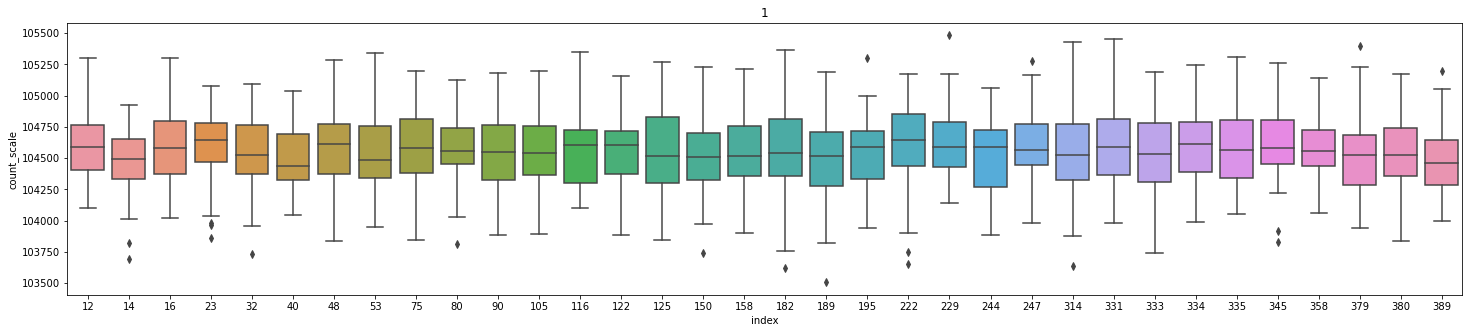

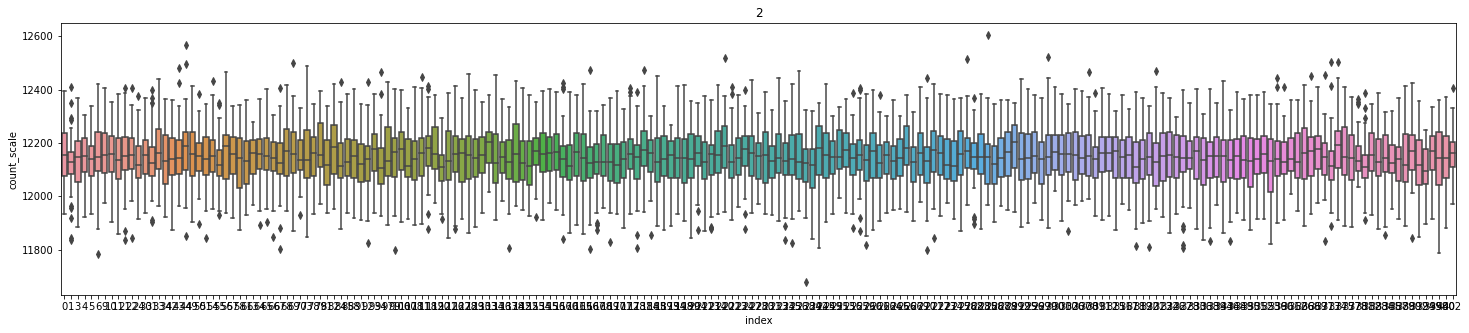

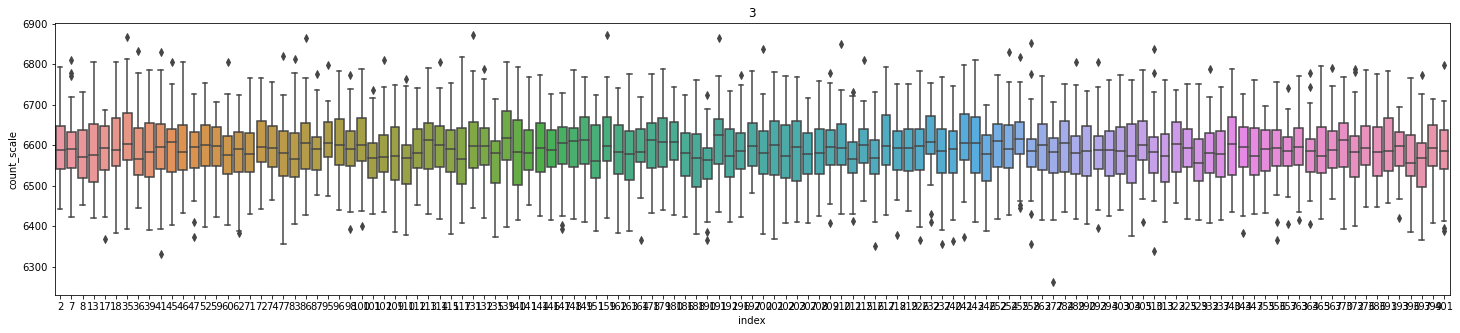

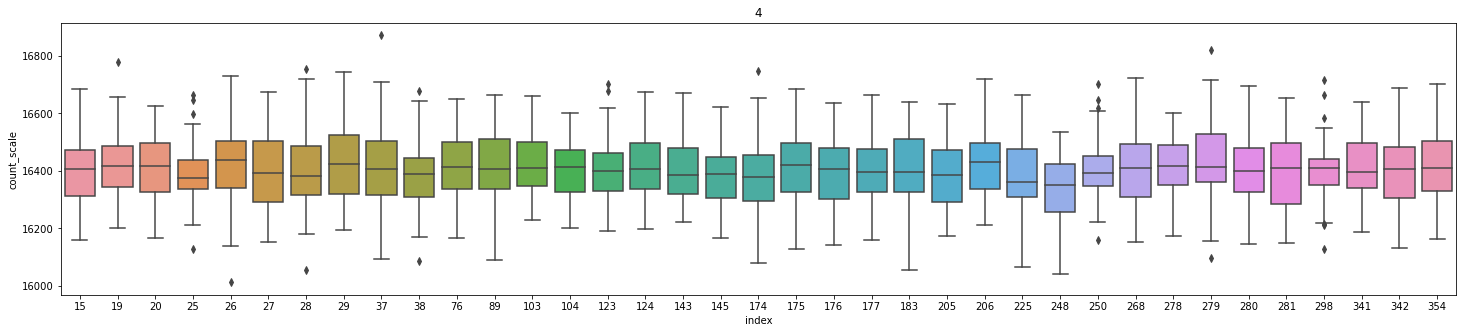

In [17]:
for group in [1,2,3,4]:
    groupDF = finalDF[finalDF.group_size_number == group]
    
    plt.figure(figsize=(25,5))
    sns.boxplot(data=groupDF,x='index',y='count_scale')
    plt.title(str(group))
    plt.show()
    plt.close()

# This one is for bootstrapping/resampling 403 AND THEN scaling up to 7.5 million

In [4]:
###bootstrap to 403 

#import dataframes that will allow us to scale the sample by square footage
scale = pd.read_csv("D:\\California\\finalGroup\\results_out_oneLag\\heatingCooling\\dfs\\scale_up_homes.csv")
metaData = pd.read_csv("D:\\California\\finalGroup\\results_out_oneLag\\heatingCooling\\dfs\\ecobee_metadata_regression.csv",
                       usecols=['Identifier','Floor_Area__ft2_']).reset_index()


identifiers = metaData.Identifier.unique()

#####variables######
num_homes = 7500000
nBoot = 100 #number of times we want to bootstap 

###########
finalFinalDF = pd.DataFrame()

for k in range(nBoot):
    print(str(k+1))
    bootDF = pd.DataFrame()
    
    newIndex = np.random.choice(metaData['index'],size=len(metaData['index']),replace=True)
    unique, counts = np.unique(metaData.index[newIndex], return_counts = True)
                                     
    countsDF = pd.DataFrame({'indexMerge':unique,'count_scale':counts})
    
    finalDF = metaData.merge(countsDF,how='left',left_on='index',right_on='indexMerge')                            
    finalDF['boostrap_run'] = k+1
    finalDF['count_scale'] = finalDF.count_scale.fillna(0)                            

    finalDF.to_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\bootstrapHomesWeight\\test_50_403_final\\bootstrap_weight\\bootstrap_"+str(k+1)+".csv")
    print('saved weighting')
    finalFinalDF = pd.concat([finalFinalDF,finalDF])

    
    finalDF = finalDF.set_index('Identifier')
    for year in [2016,2017,2018,2019]: 
        print(str(year))
        for hour in [1,2,3,4]:
            lolp = pd.read_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\"+str(year)+"\\lolpBase_"+str(year)+".csv")
            
            overrideFinal = pd.DataFrame()
            noOverrideFinal = pd.DataFrame()
    
            override= pd.DataFrame()
            noOverride = pd.DataFrame()
    
            count = 0
            for low, high, percent in zip(scale.more_than, scale.less_than, scale.percentage):
                overrideFilter = pd.DataFrame()
                noOverrideFilter = pd.DataFrame()
                scaleUp = percent * num_homes
        
                #get the homes from the metadata with the size we want 
                sample = metaData[(metaData.Floor_Area__ft2_ >= low) & (metaData.Floor_Area__ft2_ < high)].reset_index() #identifiers in group
                sampleHomes = finalDF[(finalDF.count_scale >0)&(finalDF.index.isin(sample.Identifier))] #get weighting from the identifiers 
                sampleNum = sampleHomes.count_scale.sum() # number of homes in group (i.e. number of times the homes are weighted)


                for identifier in sample.Identifier:
                    homeDF = pd.read_csv('D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\'+str(year)+'\\identifiers\\hour'+str(hour)+'\\'+identifier+'_lolp_'+str(year)+'.csv')

                    scaleID = finalDF.loc[identifier,'count_scale'] 
                    
                    overrideFilter  = overrideFilter.add(pd.DataFrame(homeDF['observed_impact_kW_mean']*-1*scaleID),fill_value=0)
                    noOverrideFilter  = noOverrideFilter.add(pd.DataFrame(homeDF['counterfactual_impact_kW_mean']*-1*scaleID),fill_value=0)
        
    
                noOverride = noOverride.add(pd.DataFrame(noOverrideFilter['counterfactual_impact_kW_mean']/1000 * percent * num_homes/sampleNum),fill_value=0)
                override = override.add(pd.DataFrame(overrideFilter['observed_impact_kW_mean']/1000 * percent * num_homes/sampleNum),fill_value=0) 
        

            overrideFinal = lolp.merge(override,how='left',left_index=True,right_index=True)
            overrideFinal = overrideFinal.rename(columns={'observed_impact_kW_mean':'delta_override'})
            overrideFinal.to_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\"+str(year)+"\\bootstrapScaleResults\\test100_403_final_Bootstrap_dataframes\\overrideSavings_hour"+str(hour)+"_"+str(year)+"_bootstrap"+str(k+1)+".csv")
    
            noOverrideFinal = lolp.merge(noOverride,how='left',left_index=True,right_index=True)
            noOverrideFinal = noOverrideFinal.rename(columns={'counterfactual_impact_kW_mean':'delta_noOverride'})
            noOverrideFinal.to_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\"+str(year)+"\\bootstrapScaleResults\\test100_403_final_Bootstrap_dataframes\\noOverrideSavings_hour"+str(hour)+"_"+str(year)+"_bootstrap"+str(k+1)+".csv")
    
finalFinalDF.to_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\bootstrapHomesWeight\\test_100_403_final\\fullGroupWeighting.csv")

  

    

1
saved weighting
2016
2017
2018
2019
2
saved weighting
2016
2017
2018
2019
3
saved weighting
2016
2017
2018
2019
4
saved weighting
2016
2017
2018
2019
5
saved weighting
2016
2017
2018
2019
6
saved weighting
2016
2017
2018
2019
7
saved weighting
2016
2017
2018
2019
8
saved weighting
2016
2017
2018
2019
9
saved weighting
2016
2017
2018
2019
10
saved weighting
2016
2017
2018
2019
11
saved weighting
2016
2017
2018
2019
12
saved weighting
2016
2017
2018
2019
13
saved weighting
2016
2017
2018
2019
14
saved weighting
2016
2017
2018
2019
15
saved weighting
2016
2017
2018
2019
16
saved weighting
2016
2017
2018
2019
17
saved weighting
2016
2017
2018
2019
18
saved weighting
2016
2017
2018
2019
19
saved weighting
2016
2017
2018
2019
20
saved weighting
2016
2017
2018
2019
21
saved weighting
2016
2017
2018
2019
22
saved weighting
2016
2017
2018
2019
23
saved weighting
2016
2017
2018
2019
24
saved weighting
2016
2017
2018
2019
25
saved weighting
2016
2017
2018
2019
26
saved weighting
2016
2017
2018


OSError: Cannot save file into a non-existent directory: 'D:\California\finalGroup\results_estimatesFromEmpirical\elcc_boostrapping_differentYears\bootstrapHomesWeight\test50_403_final'

In [25]:
group = 0
finalFinalDF['group_size_number'] = 'na'
for low, high, percent in zip(scale.more_than, scale.less_than, scale.percentage):
    group += 1
    finalFinalDF['group_size_number'] = np.where((finalFinalDF.Floor_Area__ft2_ >=low)&(finalFinalDF.Floor_Area__ft2_ <high),group,finalFinalDF['group_size_number'])

finalFinalDF.to_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\bootstrapHomesWeight\\test_1000_403\\fullGroupWeighting.csv")
finalFinalDF.head(25)

,index,Identifier,Floor_Area__ft2_,indexMerge,count_scale,boostrap_run,group_size_number
0,0,2cd266719bc536a29407d44cfadb1648a43c56bf,1500,NaN,0.0,1,2
1,1,d253b818fdcfab79d1aef2f85b25daf5ab914166,1500,1.0,1.0,1,2
2,2,a63438fbf6c57c582e02cb0ac38f802562e5f795,2500,NaN,0.0,1,3
3,3,e5b8175ffd51c5ab2d372d3579db46ff94f858ec,2000,3.0,1.0,1,2
4,4,a4180e0682a7d1d721af7a1d021fd3181def0bce,2000,4.0,2.0,1,2
5,5,dbea08bd2c5ad1ed52e7e8045f9a9b3b485a60dd,1500,5.0,1.0,1,2
6,6,b6ef35e3b89a2345d35fdba1ef6e2e133c2b64bd,1500,6.0,1.0,1,2
7,7,c3f26d2e0c1a91a98d3bfafb9c64dec59d9755b3,3000,7.0,1.0,1,3
8,8,9b3032cc652ea926e6e48dfd3572dfce5d39babe,3000,8.0,1.0,1,3
9,9,d18d9cffbbf7724fab14f8833184ffff6f08dfdb,1500,9.0,1.0,1,2


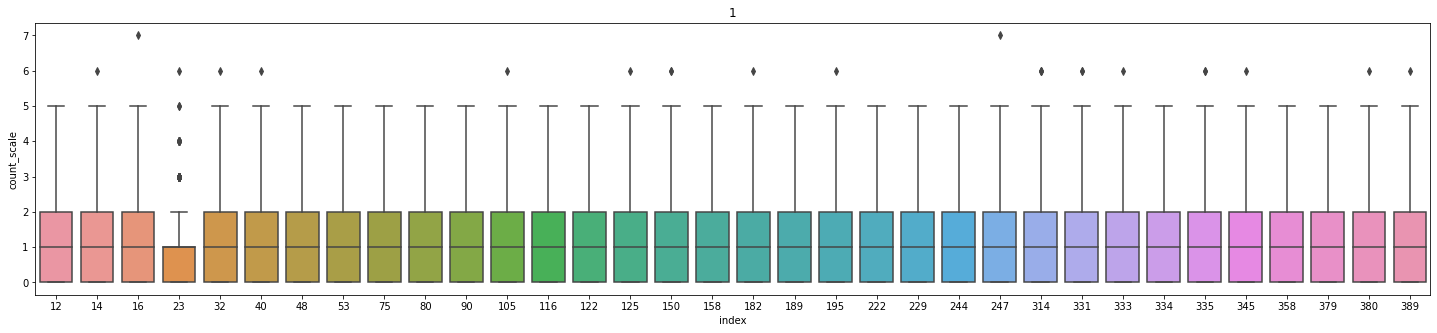

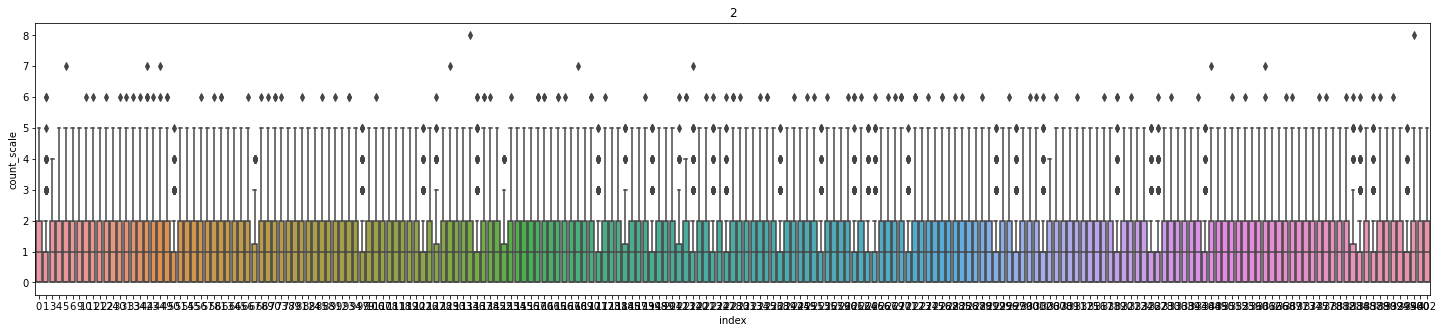

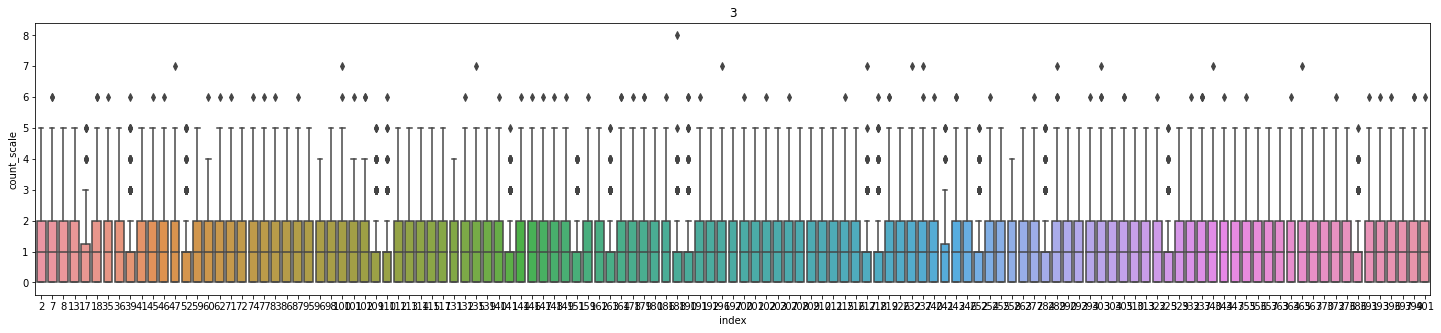

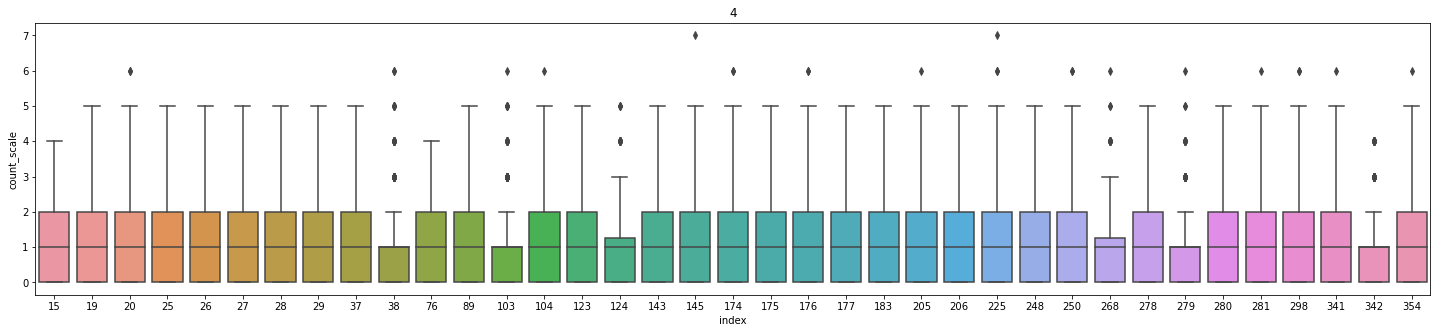

In [26]:
for group in [1,2,3,4]:
    groupDF = finalFinalDF[finalFinalDF.group_size_number == group]
    
    plt.figure(figsize=(25,5))
    sns.boxplot(data=groupDF,x='index',y='count_scale')
    plt.title(str(group))
    plt.show()
    plt.close()

In [27]:
means = pd.read_csv('D:\\California\\finalGroup\\results_estimatesFromEmpirical\\resultByHourStdevMean.csv',
                   usecols=['Identifier','hour_event','observed_impact_kW_mean',
                           'counterfactual_impact_kW_mean'])
meansMelt = pd.melt(means,id_vars=['Identifier','hour_event'],value_vars=['observed_impact_kW_mean','counterfactual_impact_kW_mean'])
meansMelt.head(10)

,Identifier,hour_event,variable,value
0,2cd266719bc536a29407d44cfadb1648a43c56bf,1,observed_impact_kW_mean,-0.290078
1,2cd266719bc536a29407d44cfadb1648a43c56bf,2,observed_impact_kW_mean,0.243636
2,2cd266719bc536a29407d44cfadb1648a43c56bf,3,observed_impact_kW_mean,0.305416
3,2cd266719bc536a29407d44cfadb1648a43c56bf,4,observed_impact_kW_mean,0.578766
4,d253b818fdcfab79d1aef2f85b25daf5ab914166,1,observed_impact_kW_mean,-0.784822
5,d253b818fdcfab79d1aef2f85b25daf5ab914166,2,observed_impact_kW_mean,-0.034415
6,d253b818fdcfab79d1aef2f85b25daf5ab914166,3,observed_impact_kW_mean,0.518288
7,d253b818fdcfab79d1aef2f85b25daf5ab914166,4,observed_impact_kW_mean,0.582019
8,a63438fbf6c57c582e02cb0ac38f802562e5f795,1,observed_impact_kW_mean,-0.748025
9,a63438fbf6c57c582e02cb0ac38f802562e5f795,2,observed_impact_kW_mean,0.221953


In [28]:
finalFinalDF = pd.read_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\bootstrapHomesWeight\\test_1000_403\\fullGroupWeighting.csv")
meansHour = meansMelt[(meansMelt.hour_event == 1)&(meansMelt.variable == 'counterfactual_impact_kW_mean')]
finalMeans = finalFinalDF.merge(meansHour[['Identifier','value']],how='left',on='Identifier')
finalMeans.head()

,Unnamed: 0,index,Identifier,Floor_Area__ft2_,indexMerge,count_scale,boostrap_run,group_size_number,value
0,0,0,2cd266719bc536a29407d44cfadb1648a43c56bf,1500,NaN,0.0,1,2,-0.710383
1,1,1,d253b818fdcfab79d1aef2f85b25daf5ab914166,1500,1.0,1.0,1,2,-0.834761
2,2,2,a63438fbf6c57c582e02cb0ac38f802562e5f795,2500,NaN,0.0,1,3,-0.910097
3,3,3,e5b8175ffd51c5ab2d372d3579db46ff94f858ec,2000,3.0,1.0,1,2,-0.946913
4,4,4,a4180e0682a7d1d721af7a1d021fd3181def0bce,2000,4.0,2.0,1,2,-0.827795


In [29]:
scale = pd.read_csv("D:\\California\\finalGroup\\results_out_oneLag\\heatingCooling\\dfs\\scale_up_homes.csv")
scale['group_size_number'] = scale.index + 1
scale.head()

,more_than,less_than,percentage,num_homes,group_size_number
0,0,1500,0.473988,82,1
1,1500,2500,0.335260,58,2
2,2500,3500,0.109827,19,3
3,3500,15000,0.080925,14,4


In [47]:
meansMerge = finalMeans.merge(scale[['group_size_number','percentage']],how='left',on='group_size_number')
meansMerge.to_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\bootstrapHomesWeight\\test_1000_403\\all_bootstrapRuns_RESULTS.csv")
print(meansMerge.boostrap_run.unique())
meansMerge.head()

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14
   15   16   17   18   19   20   21   22   23   24   25   26   27   28
   29   30   31   32   33   34   35   36   37   38   39   40   41   42
   43   44   45   46   47   48   49   50   51   52   53   54   55   56
   57   58   59   60   61   62   63   64   65   66   67   68   69   70
   71   72   73   74   75   76   77   78   79   80   81   82   83   84
   85   86   87   88   89   90   91   92   93   94   95   96   97   98
   99  100  101  102  103  104  105  106  107  108  109  110  111  112
  113  114  115  116  117  118  119  120  121  122  123  124  125  126
  127  128  129  130  131  132  133  134  135  136  137  138  139  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  158  159  160  161  162  163  164  165  166  167  168
  169  170  171  172  173  174  175  176  177  178  179  180  181  182
  183  184  185  186  187  188  189  190  191  192  193  194  195  196
  197 

,Unnamed: 0,index,Identifier,Floor_Area__ft2_,indexMerge,count_scale,boostrap_run,group_size_number,value,percentage
0,0,0,2cd266719bc536a29407d44cfadb1648a43c56bf,1500,0.0,1.0,1,2,-0.710383,0.335260
1,1,1,d253b818fdcfab79d1aef2f85b25daf5ab914166,1500,1.0,1.0,1,2,-0.834761,0.335260
2,2,2,a63438fbf6c57c582e02cb0ac38f802562e5f795,2500,2.0,2.0,1,3,-0.910097,0.109827
3,3,3,e5b8175ffd51c5ab2d372d3579db46ff94f858ec,2000,3.0,3.0,1,2,-0.946913,0.335260
4,4,4,a4180e0682a7d1d721af7a1d021fd3181def0bce,2000,NaN,0.0,1,2,-0.827795,0.335260


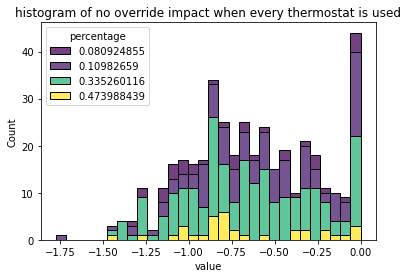

In [38]:
finalMeans1=meansMerge[meansMerge.boostrap_run==1]
sns.histplot(data=finalMeans1,x='value',hue='percentage',palette='viridis', multiple="stack",bins=30)
plt.title('histogram of no override impact when every thermostat is used')
plt.show()
plt.close()

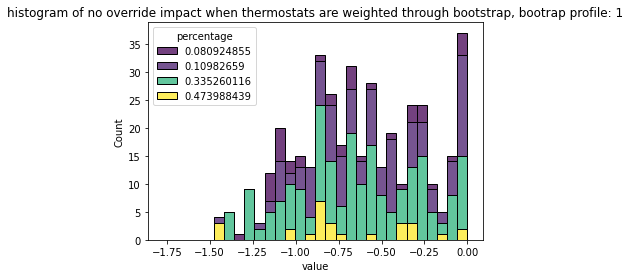

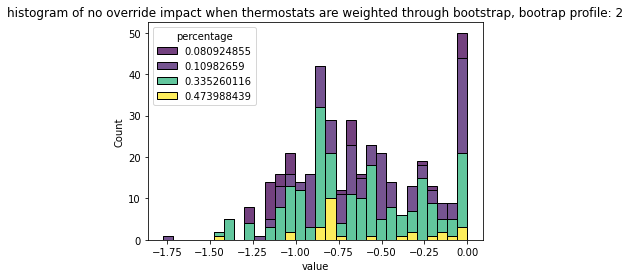

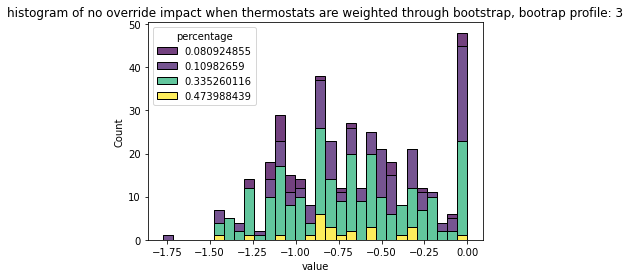

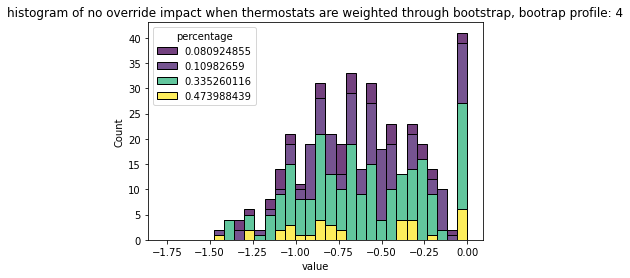

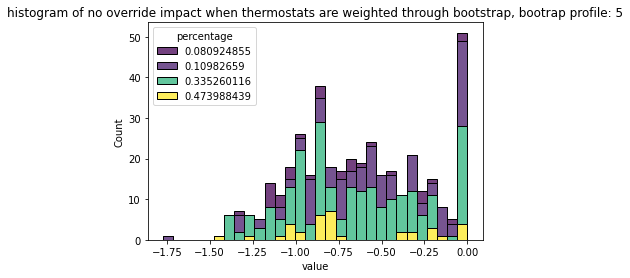

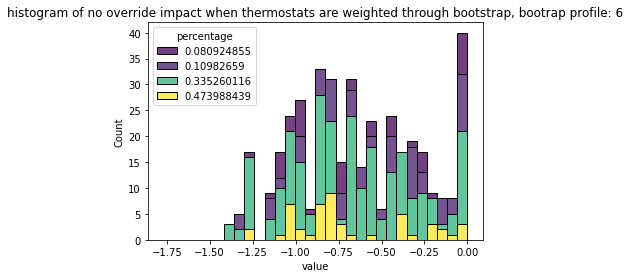

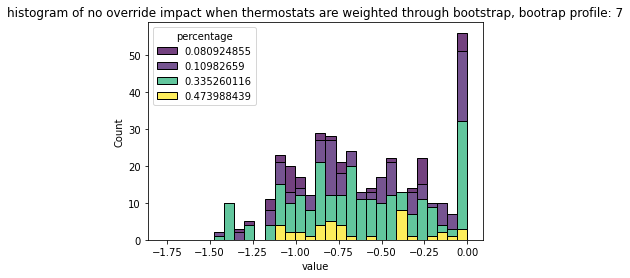

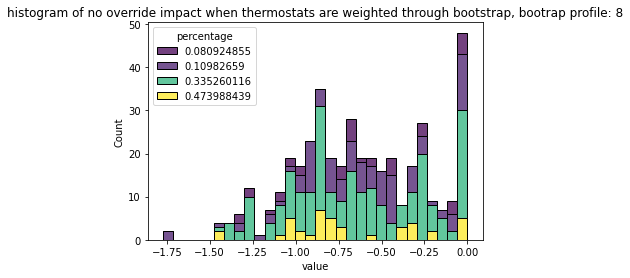

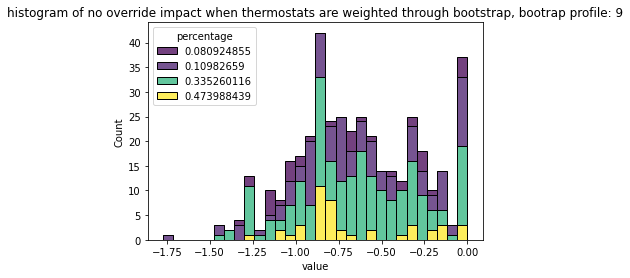

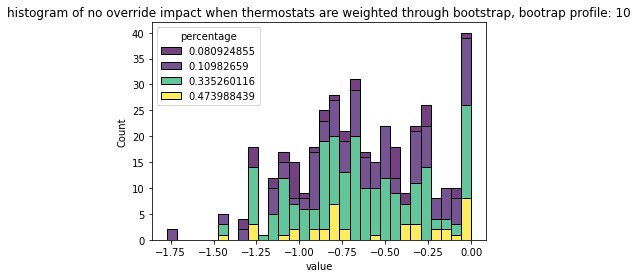

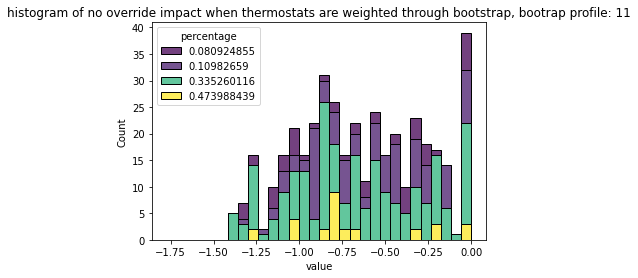

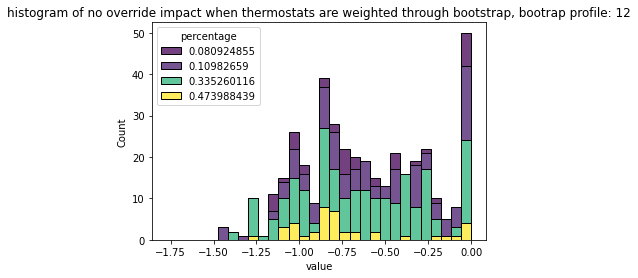

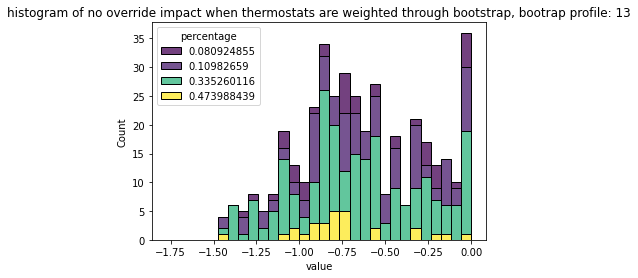

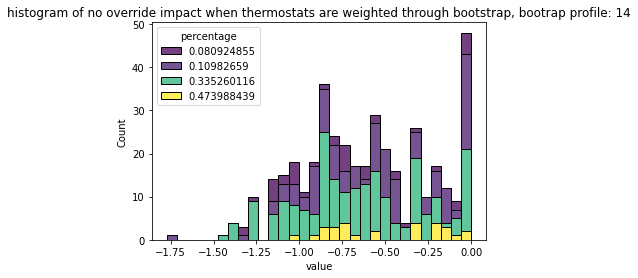

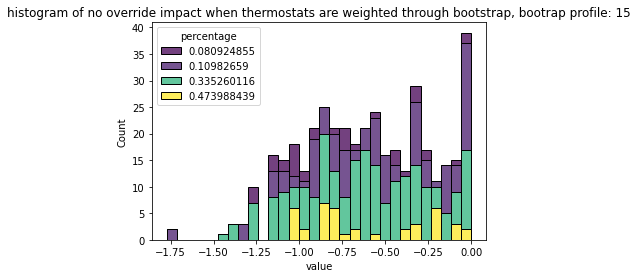

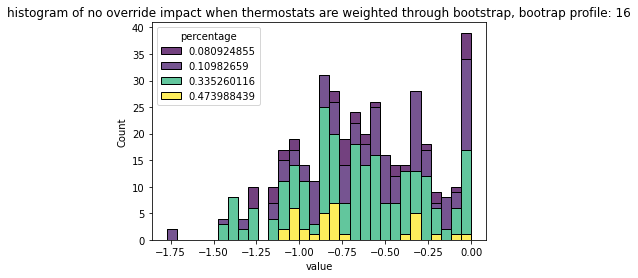

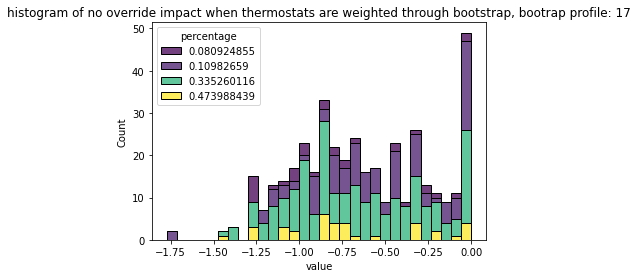

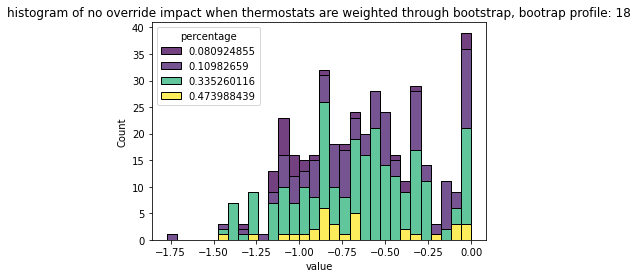

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [39]:
for k in range(1,51):
    finalMeans1 = meansMerge[meansMerge.boostrap_run == k]
    sns.histplot(data=finalMeans1,x='value',hue='percentage',palette='viridis', multiple="stack",weights='count_scale',bins=30)
    plt.title('histogram of no override impact when thermostats are weighted through bootstrap, bootrap profile: '+str(k))
    plt.show()
    plt.close()
    

In [6]:
finalDF = pd.DataFrame()
for k in range(1,51):
    dfNo = pd.read_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\2019\\bootstrapScaleResults\\test50_403_final_Bootstrap_dataframes\\noOverrideSavings_hour4_2019_bootstrap"+str(k)+".csv")
    oneNo = dfNo[dfNo.hour_event ==1].delta_noOverride.mean()
    twoNo = dfNo[dfNo.hour_event == 2].delta_noOverride.mean()
    threeNo = dfNo[dfNo.hour_event == 3].delta_noOverride.mean()
    fourNo = dfNo[dfNo.hour_event == 4].delta_noOverride.mean()

    df = pd.read_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\2019\\bootstrapScaleResults\\test50_403_final_Bootstrap_dataframes\\overrideSavings_hour4_2019_bootstrap"+str(k)+".csv")
    one = df[df.hour_event ==1].delta_override.mean()
    two = df[df.hour_event == 2].delta_override.mean()
    three = df[df.hour_event == 3].delta_override.mean()
    four = df[df.hour_event == 4].delta_override.mean()
        
    dfNew = pd.DataFrame({'hour_events_run':[1,2,3,4,1,2,3,4],
                            'bootstrap_run':[k,k,k,k,k,k,k,k],
                            'state':['override','override','override','override','noOverride','noOverride','noOverride','noOverride'],
                            'impact':[one,two,three,four,oneNo,twoNo,threeNo,fourNo]})
    finalDF = pd.concat([finalDF,dfNew])
finalDF.to_csv("D:\\California\\finalGroup\\results_estimatesFromEmpirical\\elcc_boostrapping_differentYears\\bootstrapHomesWeight\\test_50_403_final\\all_bootstrapRuns_valuesPerHour.csv")

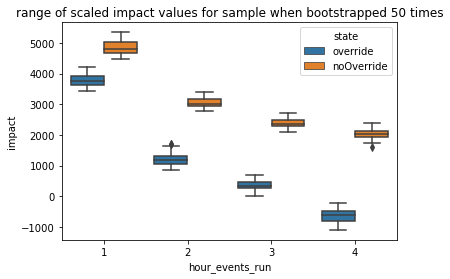

In [7]:
sns.boxplot(data=finalDF,x='hour_events_run',y='impact',hue='state')
plt.title('range of scaled impact values for sample when bootstrapped 50 times')
plt.show()
plt.close()

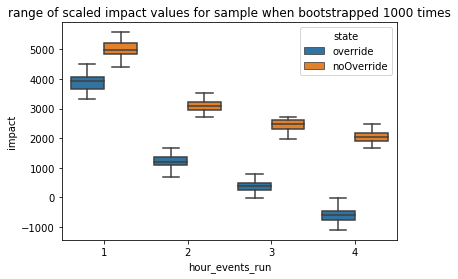

In [31]:
#### DO NOT TOUCH, ORIGINAL FOR 1000 Bootstrap#####
sns.boxplot(data=finalDF,x='hour_events_run',y='impact',hue='state')
plt.title('range of scaled impact values for sample when bootstrapped 1000 times')
plt.show()
plt.close()